### **Breast Canacer Classification with a Simple Neural Network(NN)**

**Importing the Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Data Collection And Preprocessing**

In [2]:
#Loading the Data from sklearn
import sklearn.datasets # Import the sklearn.datasets module
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()


In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
# loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
# print the first 5 rows of the dataframe
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# adding the 'target' column to the data frame
data_frame['label'] = breast_cancer_dataset.target

In [7]:
# print last 5 rows of the dataframe
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
# number of rows and columns in the dataset
data_frame.shape

(569, 31)

In [9]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
# checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [11]:
# statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [13]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Separating the features and target

In [14]:
X = data_frame.drop(columns='label', axis=1)
Y = data_frame['label']

In [15]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [16]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [20]:
### Import tensorflow and keras

In [21]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [22]:
### Build the model
model_1 = Sequential()

model_1.add(Flatten(input_dim  = X_train.shape[1],))
model_1.add(Dense(20,activation = 'relu'))
model_1.add(Dense(2,activation = 'sigmoid'))



In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 20)                620       
                                                                 
 dense_1 (Dense)             (None, 2)                 42        
                                                                 
Total params: 662 (2.59 KB)
Trainable params: 662 (2.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


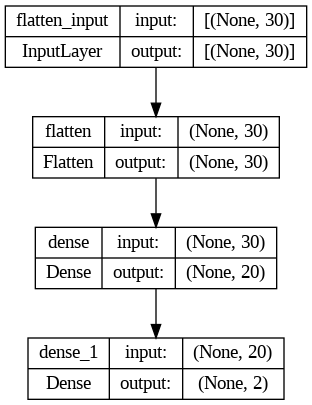

In [24]:
###plot the model
from tensorflow.keras.utils import plot_model
plot_model(model_1,show_shapes=True)

In [25]:
from tensorflow.keras.optimizers import Adam #,SGD,RMSprop,Adagrad,Adadelta,Nadam,Adamax,Ftrl,AdamW,Optimizer

In [26]:
from tensorflow.keras.losses import sparse_categorical_crossentropy

In [27]:
model_1.compile(optimizer ='adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss',patience = 5)

In [29]:
### Train the model

history = model_1.fit(X_train_std,Y_train,
                      validation_split = 0.1,
                      epochs = 50,
                      batch_size = 32,
                      callbacks = [early_stop])

Epoch 1/50
13/13 [==============================] - 3s 67ms/step - loss: 0.6785 - accuracy: 0.6748 - val_loss: 0.3910 - val_accuracy: 0.8043
Epoch 2/50
13/13 [==============================] - 0s 18ms/step - loss: 0.3908 - accuracy: 0.8313 - val_loss: 0.2477 - val_accuracy: 0.9130
Epoch 3/50
13/13 [==============================] - 0s 18ms/step - loss: 0.2606 - accuracy: 0.9242 - val_loss: 0.1835 - val_accuracy: 0.9348
Epoch 4/50
13/13 [==============================] - 0s 17ms/step - loss: 0.2050 - accuracy: 0.9413 - val_loss: 0.1518 - val_accuracy: 0.9783
Epoch 5/50
13/13 [==============================] - 0s 14ms/step - loss: 0.1764 - accuracy: 0.9413 - val_loss: 0.1327 - val_accuracy: 0.9783
Epoch 6/50
13/13 [==============================] - 0s 9ms/step - loss: 0.1575 - accuracy: 0.9462 - val_loss: 0.1191 - val_accuracy: 0.9783
Epoch 7/50
13/13 [==============================] - 0s 11ms/step - loss: 0.1429 - accuracy: 0.9560 - val_loss: 0.1093 - val_accuracy: 0.9783
Epoch 8/50
13/

### **Visualizing Accuracy and Loss**

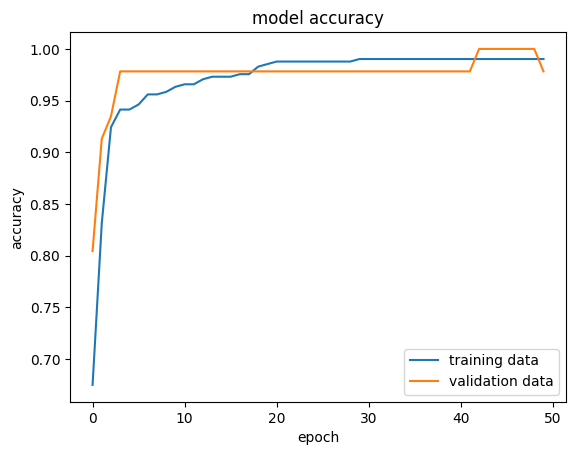

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'])

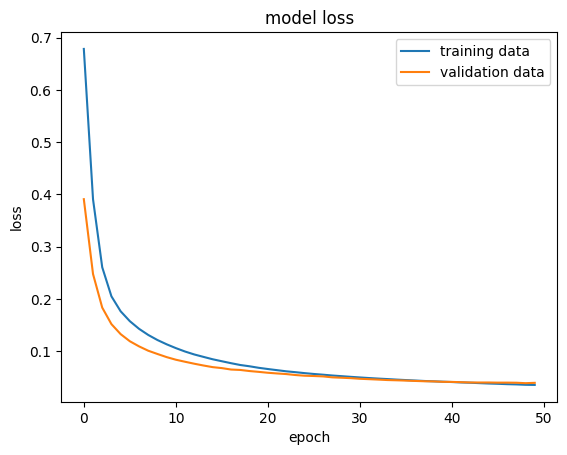

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'])

In [39]:
##Evlaute the model
loss,accuracy = model_1.evaluate(X_test_std,Y_test)
print('loss',loss)
print('accuracy',accuracy)


4/4 [==============================] - 0s 4ms/step - loss: 0.1075 - accuracy: 0.9474
loss 0.10747087746858597
accuracy 0.9473684430122375


In [40]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [42]:
##PRedict
y_pred = model_1.predict(X_test_std)
#Here,

4/4 [==============================] - 0s 3ms/step


In [41]:
print(y_pred.shape)
print(y_pred[0])
#here,it gives 2 values for the one data point
#it gives the probalility of datapoint being  and data point being 1

(114, 2)
[0.22277762 0.8839426 ]


In [43]:
print(y_pred)

[[2.22777620e-01 8.83942604e-01]
 [5.91045320e-01 5.67919970e-01]
 [2.10025683e-02 9.85946119e-01]
 [1.00000000e+00 2.87403436e-05]
 [3.73169303e-01 8.25186610e-01]
 [9.99936402e-01 2.24076374e-03]
 [1.61390245e-01 7.93315649e-01]
 [1.23875700e-02 9.95421112e-01]
 [2.45080069e-02 9.79005158e-01]
 [3.01054604e-02 9.86212313e-01]
 [9.13571000e-01 3.55440944e-01]
 [1.22861698e-01 9.28599477e-01]
 [3.06284904e-01 7.77081370e-01]
 [1.49119318e-01 8.10968399e-01]
 [2.58024894e-02 9.71191764e-01]
 [9.85228777e-01 8.22913572e-02]
 [1.98525805e-02 9.83615637e-01]
 [1.45627959e-02 9.97086406e-01]
 [6.06525987e-02 9.50043738e-01]
 [9.99698997e-01 3.41292145e-03]
 [1.36368442e-03 9.95257795e-01]
 [2.54338533e-02 9.93449628e-01]
 [2.48572938e-02 9.81042862e-01]
 [1.27943195e-02 9.97048020e-01]
 [1.50128379e-01 9.44409132e-01]
 [9.99572992e-01 1.31196659e-02]
 [8.96658823e-02 9.62733209e-01]
 [2.47919247e-01 8.63445997e-01]
 [9.98301387e-01 5.03168218e-02]
 [9.99655902e-01 2.61695608e-02]
 [1.803997

### **model.predict() gives prediction probabilty of each class for the data point**

In [ ]:
#converting the Prediction probability of each classes
#example of the how we calculate the argmax
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0]


## **Bulding the Predictive System**

In [70]:
input_data = (X_test.iloc[49])
#change the input to numpy array

input_data_as_numpy_array = np.asarray(input_data)



#reshape the numpy array as we predicting for data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)




#standardize the input data
input_data_std = scaler.transform(input_data_reshaped)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
print(input_data_reshaped.shape)
input_data_reshaped

(1, 30)


array([[1.831e+01, 2.058e+01, 1.208e+02, 1.052e+03, 1.068e-01, 1.248e-01,
        1.569e-01, 9.451e-02, 1.860e-01, 5.941e-02, 5.449e-01, 9.225e-01,
        3.218e+00, 6.736e+01, 6.176e-03, 1.877e-02, 2.913e-02, 1.046e-02,
        1.559e-02, 2.725e-03, 2.186e+01, 2.620e+01, 1.422e+02, 1.493e+03,
        1.492e-01, 2.536e-01, 3.759e-01, 1.510e-01, 3.074e-01, 7.863e-02]])

In [72]:
prediction = model_1.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')



1/1 [==============================] - 0s 25ms/step
[[0.9994258  0.03032214]]
[0]
The tumor is Malignant


- Give input in another way

In [ ]:
### Build the model
model = Sequential()

# Specify the number of units for the first Dense layer
model.add(Dense(units=64, input_dim=X_train.shape[1],activation = 'relu'))# Example: 64 units
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1984      
                                                                 
 dense_6 (Dense)             (None, 20)                1300      
                                                                 
 dense_7 (Dense)             (None, 2)                 42        
                                                                 
Total params: 3326 (12.99 KB)
Trainable params: 3326 (12.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


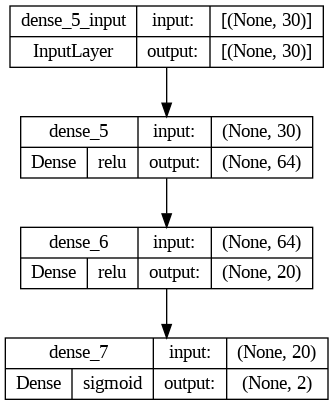

In [ ]:
###plot the model
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_activations=True) # Remove show_activations argument


In [ ]:
model.compile(optimizer = 'adam',
                        loss = 'sparse_categorical_crossentropy',
                        metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train_std,Y_train,epochs = 10)

Epoch 1/10
15/15 [==============================] - 1s 2ms/step - loss: 0.5891 - accuracy: 0.6418
Epoch 2/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.9297
Epoch 3/10
15/15 [==============================] - 0s 2ms/step - loss: 0.1814 - accuracy: 0.9451
Epoch 4/10
15/15 [==============================] - 0s 2ms/step - loss: 0.1290 - accuracy: 0.9648
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.1010 - accuracy: 0.9736
Epoch 6/10
15/15 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9780
Epoch 7/10
15/15 [==============================] - 0s 2ms/step - loss: 0.0741 - accuracy: 0.9780
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9780
Epoch 9/10
15/15 [==============================] - 0s 2ms/step - loss: 0.0610 - accuracy: 0.9802
Epoch 10/10
15/15 [==============================] - 0s 2ms/step - loss: 0.0565 - accuracy: 0.9846


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

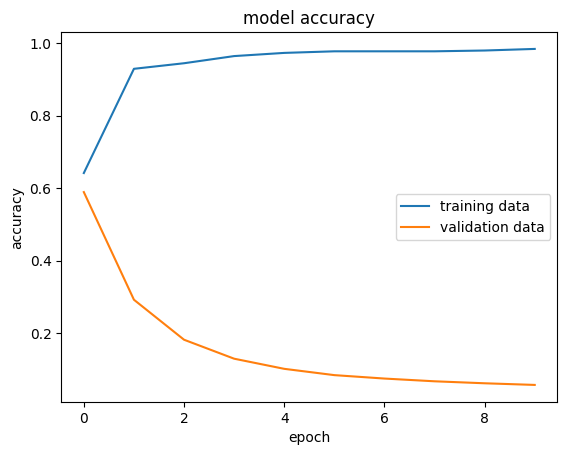

In [ ]:
###plot the accurcay
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'])

In [ ]:
y_pred = model.predict(X_test_std)

4/4 [==============================] - 0s 4ms/step


In [ ]:
###Evaluate
loss,accuracy = model.evaluate(X_test_std,Y_test)
print('loss',loss)
print('accuracy',accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 0.9649
loss 0.10422743111848831
accuracy 0.9649122953414917


In [ ]:
###Evaluate
from sklearn.metrics import confusion_matrix,classification_report

# Assuming 'model' outputs probabilities, convert to predicted class labels
y_pred_classes = np.argmax(y_pred, axis=1)  # Adjust 'axis' if needed

# Use the true labels (assuming you have a variable named 'Y_test')
print(confusion_matrix(Y_test, y_pred_classes))
print(classification_report(Y_test, y_pred_classes))

[[44  1]
 [ 3 66]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.99      0.96      0.97        69

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

